In [4]:
import pandas as pd 
from matplotlib import pyplot as plt 

In [6]:
df = pd.read_csv("nasdaq100.csv", sep=';')

In [8]:
df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [10]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [12]:
#df.drop('Date', axis=1)
df = df.drop(columns = ['Date'])

In [14]:
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0.5, 1.0, 'Stock Prices')

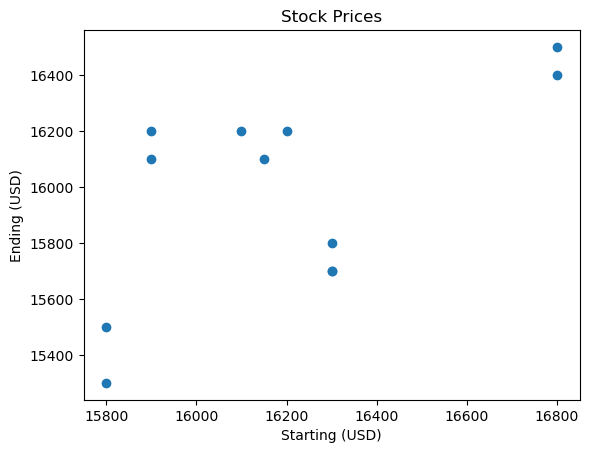

In [16]:
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')

In [18]:
x = df.drop('Ending (USD)', axis=1)

In [20]:
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [22]:
y = df[['Ending (USD)']]
y.head()

,Ending (USD)
0,16500
1,16100
2,15300
3,16200
4,15700


# Linear Regression

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [27]:
x.mean()

Starting (USD)    16195.833333
dtype: float64

In [28]:
y.mean()

Ending (USD)    15975.0
dtype: float64

Text(0.5, 1.0, 'Stock Prices')

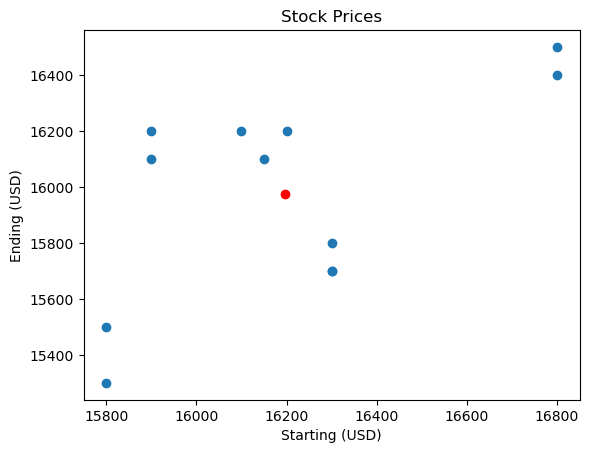

In [30]:
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')

In [36]:
reg.fit(x, y) #train the ml model

LinearRegression()

In [17]:
m = reg.coef_
m

array([[0.65258293]])

In [18]:
c = reg.intercept_
c

array([5405.87555702])

In [19]:
# y = mx + c

In [20]:
m*16700 + c

array([[16304.0105628]])

In [21]:
reg.predict([[16700]])

C:\Users\rashe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16304.0105628]])

In [22]:
df['Predicted_y'] = reg.predict(x)
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


Text(0.5, 1.0, 'Stock Prices')

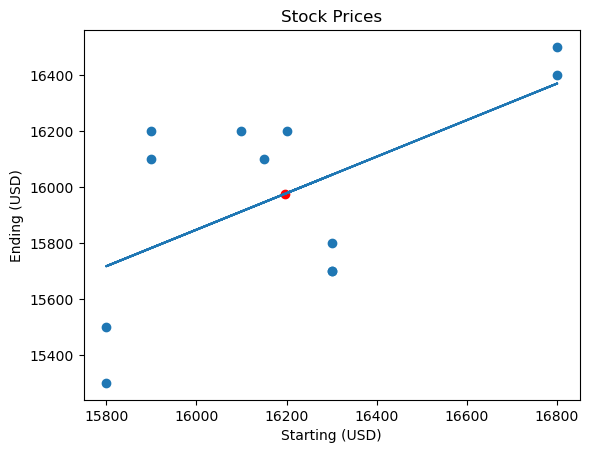

In [38]:
#plt.plot(x, df['Predicted_y'])
plt.plot(x, reg.predict(x))
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('Stock Prices')

In [24]:
reg.predict([[16600]])

C:\Users\rashe\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[16238.75226935]])

In [25]:
df.head()

,Starting (USD),Ending (USD),Predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389


# Loss and Cost Function

In [26]:
df['loss'] = df['Ending (USD)'] - df['Predicted_y']

In [27]:
df.head()

,Starting (USD),Ending (USD),Predicted_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389


In [28]:
#MSE and mae
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [29]:
mse = mean_squared_error(df['Ending (USD)'], df['Predicted_y'])
mse

80411.23397700385

In [30]:
mae = mean_absolute_error(df['Ending (USD)'], df['Predicted_y'])
mae

260.3840017604666

In [31]:
sum(abs(df['loss'])) / len(x)

260.3840017604666

In [32]:
reg.score(x,y)

0.3577804940272571

Text(0.5, 1.0, 'NASDAQ100 Stock Prices')

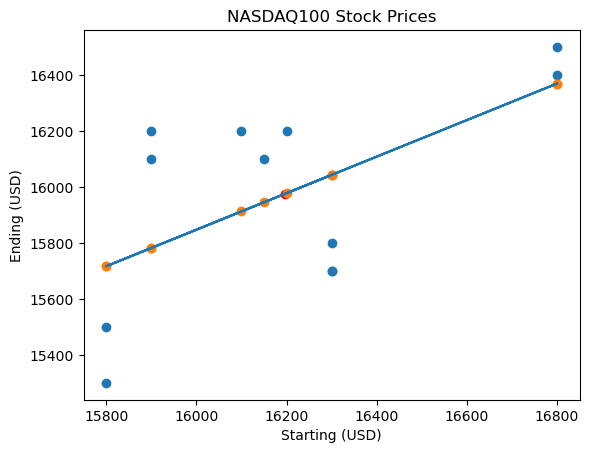

In [33]:
#plt.plot(x, df['Predicted_y'])
plt.plot(x, reg.predict(x))
plt.scatter(x.mean() , y.mean(), color='red')
plt.scatter(df['Starting (USD)'] , df['Ending (USD)'])
plt.scatter(df['Starting (USD)'] , reg.predict(x))
plt.xlabel('Starting (USD)')
plt.ylabel('Ending (USD)')
plt.title('NASDAQ100 Stock Prices')

# R2 Squared Value / Accuracy for Regression

In [34]:
reg.score(x,y)

0.3577804940272571

In [35]:
from sklearn.metrics import r2_score
r2_score(y, reg.predict(x))

0.3577804940272571